<a href="https://colab.research.google.com/github/AmenaEi/Team-11-Wotech/blob/main/Python/Class17_18Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv('/content/tvmarketing.csv')

#TV - advertising budget spent on TV marketing
#Sales - how much we sold

In [3]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


###Regression plot

In [5]:
import seaborn as sns       #seaborn library

<Axes: xlabel='TV', ylabel='Sales'>

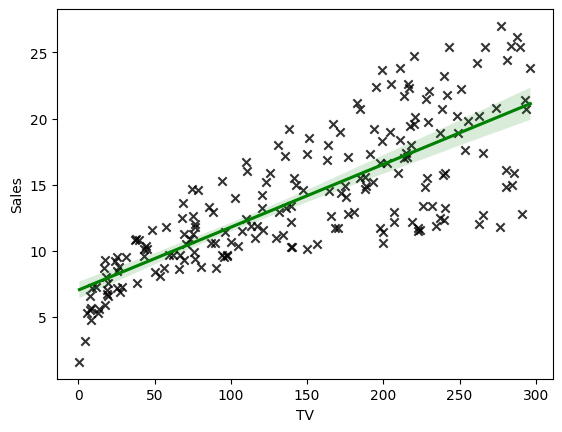

In [6]:
sns.regplot(
    x='TV',
    y='Sales',
    data=advertising,
    marker="x",
    color="black",
    line_kws=dict(color="green"))
#

###Pearson correlation koefficient

In [7]:
advertising.corr() #calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [8]:
'''
Weak Correlation: 0 to ±0.3
Moderate Correlation: ±0.3 to ±0.7
Strong Correlation: ±0.7 to ±1
'''

advertising['TV'].corr(advertising['Sales']) #calculate corr for TV against Sales
#Strong positive correlation, with increasing budget, sales increases

0.7822244248616061

### Supervised vs Unsupervised

So  supervised learning models would have a baseline understanding of what the correct output values should be.
The model is trained on labeled data, meaning the input data comes with corresponding correct outputs. The model learns to map inputs to outputs.

Supervised: Data with answers provided.
Supervised Learning aims to make predictions based on the training data.

Unsupervised: Data with no answers, and the model figures out patterns by itself.
Unsupervised Learning aims to uncover hidden patterns or structures in the data.

### Spotify example:
Supervised Learning: Predicts song popularity based on features like artist popularity, genre, and tempo. You know the outcome you're predicting (e.g., number of streams).

Unsupervised Learning: Groups similar songs into playlists without predefined labels. For example, clustering songs by tempo and energy to create a Chill playlist.

Differences

Supervised: You have labeled data and a specific prediction goal.
Unsupervised: You're finding patterns or groups in unlabeled data.

![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

### Training linear regression model

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [9]:
# Preparing x and y

X = advertising.drop('Sales', axis=1) #independed variable
#index is on raw level
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
Y = advertising.drop('TV', axis=1)
#axis = 1 means you are dropping column
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=42)
#0.7 = 70% will go to training, 30% - for testing
#random_state = seed for random

In [13]:
X_train

,TV
180,156.6
178,276.7
185,205.0
49,66.9
80,76.4
34,95.7
7,120.2
110,225.8
91,28.6
83,68.4


In [14]:
#COLUMN - feature
#ROW - observation

In [15]:
from sklearn.linear_model import LinearRegression #import the model

In [16]:
model = LinearRegression() #initialize the model (the code that is behind)

In [17]:
model.fit(X_train, y_train) #fit (train) the model

LinearRegression()

In [18]:
# Y = mx + b

print(f'Model intercept is: {model.intercept_}')
#when no advertising, how much TVs we sell (b is where the line starts on the y-axis.)
#model.intercept_ tells where your prediction line starts
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.1119333]
Model coefficient is: [[0.04477964]]


###Prediction*

In [19]:
my_new_budget = [[50]] #double brackets create 2d array data set
my_predicted_sales = model.predict(my_new_budget)
print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}')

When the new budget is 50, then predicted sales are 9


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [21]:
y_pred = model.predict(X_test)

In [22]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred #good approach, X - independed var, y - depended (that's why it's lower case)
final_df.head()

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.424449
15,195.4,22.4,15.861875
30,292.9,21.4,20.227890
158,11.7,7.3,7.635855
128,220.3,24.7,16.976888


In [23]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales'] - final_df['Predicted_sales'])
#abs - absolute terms
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.424449,2.475551
15,195.4,22.4,15.861875,6.538125
30,292.9,21.4,20.227890,1.172110
158,11.7,7.3,7.635855,0.335855
128,220.3,24.7,16.976888,7.723112


###Teamwork:
Task: This is a complicated topic, teamwork is to look at scikit-learn library together. Suggested questions to discuss:
1. What is an error rate?
2. Where you could use other machine-learning models?
3. What is the difference between supervised and unsupervised training?
4. How to import different models from the scikit-learn package?
5. How can you evaluate the performance of a machine learning model in scikit-learn?
6. What metrics are commonly used for evaluation?
7. What is model overfitting, and how can it be prevented?

Answers:

1. What is an error rate?

The error rate is how often a model makes mistakes. It's the percentage of wrong predictions out of the total.

2. Where could you use other machine-learning models?

You can use different models for things like predicting house prices, recognizing handwriting, or sorting emails into spam.

3. What is the difference between supervised and unsupervised training?

Supervised training uses labeled data (with answers) to learn, while unsupervised training works with unlabeled data and finds patterns on its own.

4. How to import different models from the scikit-learn package?

You can import models like this:

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier

5. How can you evaluate the performance of a machine learning model in scikit-learn?

You can evaluate performance using scores or metrics like accuracy, precision, or cross-validation.

6. What metrics are commonly used for evaluation?

Common metrics include accuracy (how many correct), precision (how many positives were right), recall (how many actual positives were found), and F1 score (a mix of precision and recall).

7. What is model overfitting, and how can it be prevented?

Overfitting happens when a model is too good at training data but bad at new data. It can be prevented by using simpler models, cross-validation, or regularization techniques.

# 1. What is an Error Rate?

Error Rate in machine learning is the proportion of incorrect predictions made by a model compared to the total number of predictions. It's calculated as:

Error Rate = Number of Incorrect Predictions /Total Number of Predictions

A lower error rate indicates a better-performing model.

# 2. Where You Could Use Other Machine-Learning Models?

Different machine learning models are used depending on the nature of the problem, data, and desired outcomes:

   * Classification Problems: Models like Support Vector Machines (SVM), Decision Trees, Random Forests, Logistic Regression, etc., are used to classify data into categories.
   * Regression Problems: Linear Regression, Ridge Regression, Lasso, and others are used when predicting a continuous output.
   * Clustering: Models like K-Means, DBSCAN, and Agglomerative Clustering are used for grouping data into clusters without predefined labels.
   * Dimensionality Reduction: PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) are used to reduce the number of features while preserving the data's essence.

# 3. What is the Difference Between Supervised and Unsupervised Training?

 * Supervised Training: Involves training a model on labeled data, where the input data comes with the corresponding correct output. The model learns to map inputs to outputs and can then predict the output for new, unseen data.
 * Unsupervised Training: Involves training a model on data without labeled outputs. The model tries to learn the underlying structure of the data, such as clustering similar data points or reducing dimensionality.

# 4. How to Import Different Models from the Scikit-Learn Package?

In scikit-learn, models are typically imported from their respective modules. Here are examples:

* Importing a classification model

from sklearn.ensemble import RandomForestClassifier

* Importing a regression model

from sklearn.linear_model import LinearRegression

* Importing a clustering model

from sklearn.cluster import KMeans

* Importing a dimensionality reduction technique

from sklearn.decomposition import PCA

# 5. How Can You Evaluate the Performance of a Machine Learning Model in Scikit-Learn?

Model performance can be evaluated using the score method provided by the model or by using various evaluation metrics like accuracy, precision, recall, F1-score for classification, and mean squared error (MSE) for regression. Cross-validation (cross_val_score) is also commonly used to assess model performance.

# 6. What Metrics Are Commonly Used for Evaluation?

Classification Metrics:
 * Accuracy: The ratio of correctly predicted instances to the total instances.
 * Precision: The ratio of correctly predicted positive observations to the total predicted positives.
 * Recall (Sensitivity): The ratio of correctly predicted positive observations to all observations in the actual class.
 * F1-Score: The weighted average of Precision and Recall.
 * Confusion Matrix: A table to summarize the performance, showing true positives, true negatives, false positives, and false negatives.

Regression Metrics:
 * Mean Absolute Error (MAE): The average of absolute differences between predicted and actual values.
 * Mean Squared Error (MSE): The average of squared differences between predicted and actual values.
 * R-squared (R²): The proportion of variance in the dependent variable that is predictable from the independent variables.

# 7. What is Model Overfitting, and How Can It Be Prevented?

Model Overfitting occurs when a model learns the training data too well, including its noise and outliers, leading to poor performance on new, unseen data. The model performs well on training data but fails to generalize to test data.

Prevention Techniques:
 * Cross-Validation: Using techniques like k-fold cross-validation to ensure the model generalizes well.
 * Regularization: Applying penalties to the model's complexity, such as L1 (Lasso) or L2 (Ridge) regularization.
 * Pruning: In decision trees, limiting the tree depth or cutting off branches that have little importance.
 * Dropout: In neural networks, randomly dropping units during training to prevent over-reliance on specific paths.
 * Simplifying the Model: Reducing the number of features or using a less complex model.
 * More Data: Providing more training data can help the model generalize better

# Class 18

## Visualize the results

In [25]:
final_df.reset_index(inplace=True)  #need to reset, because now indexes are random
#this will put indexes in right order

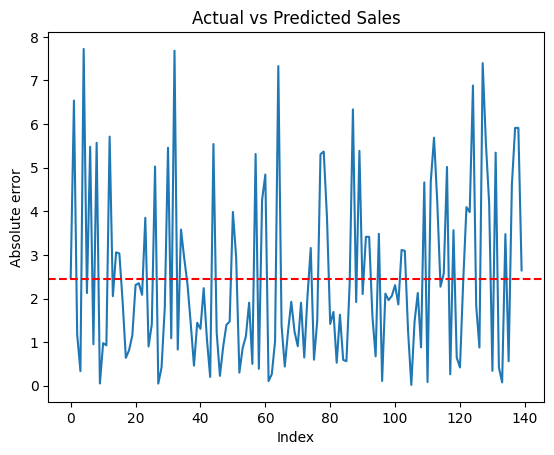

In [32]:
import matplotlib.pyplot as plt

plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Absolute error')
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), color='red', linestyle='--')
#how error rate flactuates
plt.show()


##Mean absolute error

https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

![jupiter.png](https://miro.medium.com/v2/resize:fit:1200/0*s6YGm5hBneEVNc7U.jpg)

In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
# average distance btw real and predicted data
# the lower mae is, the more accurate the model is

print(f'Mean absolute error is: {mae}')

Mean absolute error is: 2.4467260767049175


Mean Absolute Error (MAE): Imagine you’re guessing the answers to some questions, and someone tells you how far off your guesses are. The Mean Absolute Error is like the average of how much you missed the right answer by, but without squaring the mistakes like in Mean Squared Error.

So, if your Mean Absolute Error is 2.45, that means on average, your guesses are about 2.45 units away from the actual answers. It’s a way to see, on average, how much you’re off by when you make a guess.

##Mean squared error

In [36]:
#R2 (R squared)

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error is: {mse}')
print(f'R2 score is: {r2}')

Mean squared error is: 9.873168314609678
R2 score is: 0.637040625443632


* Mean Squared Error (MSE): Imagine you’re playing a game where you have to guess numbers, and someone tells you how close your guesses are to the actual numbers. The Mean Squared Error is like the average of how far off all your guesses were, squared so that bigger mistakes count more. In your case, the number 9.87 means, on average, your guesses are about 9.87 units off from the actual numbers.

* R2 Score: This is a number that tells you how good your guessing game is overall. It’s like a grade, where 1 is a perfect score (you guessed everything exactly right), and 0 means your guesses were no better than just guessing the average number every time. An R2 score of 0.64 means your guesses are pretty good—64% of the time, your guesses are close to being right.

So, with an MSE of about 9.87, your guesses are somewhat off, and with an R2 score of 0.64, you’re doing a decent job but there’s room for improvement.

##The difference between (MAE) and (MSE)

The difference between Mean Absolute Error (MAE) and Mean Squared Error (MSE) is in how they measure the mistakes or errors in predictions:

Mean Absolute Error (MAE):

What it does: It takes the absolute difference between the predicted values and the actual values, then averages those differences.
Effect: MAE treats all errors equally, so it gives you the average size of the errors without making big errors seem even bigger.
Example: If your prediction is off by 3 units and another is off by 1 unit, MAE would consider these errors as 3 and 1.
Mean Squared Error (MSE):

What it does: It squares the difference between the predicted values and the actual values, then averages those squared differences.
Effect: MSE makes bigger errors stand out more because squaring the errors makes larger mistakes much bigger. This means MSE is more sensitive to big mistakes.
Example: If your prediction is off by 3 units and another is off by 1 unit, MSE would consider these errors as 9 (because 3^2 = 9) and 1 (because 1^2 = 1).
Summary:
MAE gives you the average error in plain units, treating all errors equally.
MSE also gives you an average error but makes bigger mistakes count more by squaring them, so it's more sensitive to large errors.
Both are useful, but which one you use depends on whether you want to give more importance to big mistakes or treat all mistakes equally.